In [3]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load datasets
path = r"Student data.csv"
df = pd.read_csv(path)

In [5]:
df.head()

,study_Hours,Students_Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


In [6]:
df.tail()

,study_Hours,Students_Marks
95,3.561,19.128
96,0.301,5.609
97,7.163,41.444
98,0.309,12.027
99,6.335,32.357


In [7]:
df.shape

(100, 2)

In [8]:
# Discover and visualize the data to gain insight
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   study_Hours     100 non-null    float64
 1   Students_Marks  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [9]:
df.describe()

,study_Hours,Students_Marks
count,100.000000,100.000000
mean,4.077140,24.417690
std,2.372914,14.326199
min,0.096000,5.609000
25%,2.058500,12.633000
50%,4.022000,20.059500
75%,6.179250,36.676250
max,7.957000,55.299000


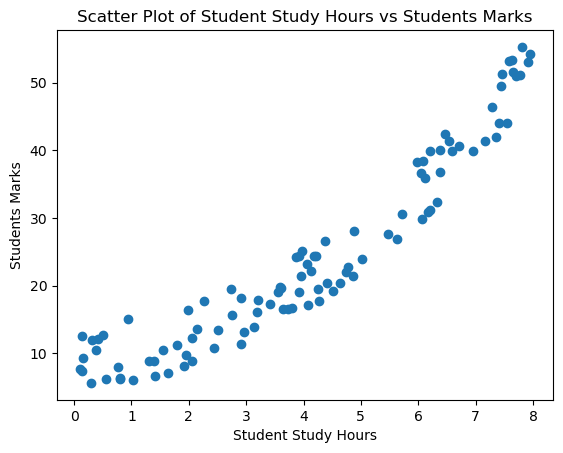

In [11]:
plt.scatter(x =df.study_Hours, y = df.Students_Marks)
plt.xlabel("Student Study Hours")
plt.ylabel("Students Marks")
plt.title("Scatter Plot of Student Study Hours vs Students Marks")
plt.show()

In [13]:
# prepare the data for machine learning algorithms
# Data cleaning
df.isnull().sum()

study_Hours       0
Students_Marks    0
dtype: int64

In [14]:
df.mean()

study_Hours        4.07714
Students_Marks    24.41769
dtype: float64

In [15]:
# split dataset
x = df.drop("Students_Marks", axis = "columns")
y = df.drop("study_Hours", axis = "columns")
print("shape of x = ", x.shape)
print("shape of y = ", y.shape)

shape of x =  (100, 1)
shape of y =  (100, 1)


In [16]:
# Train and test the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=51)
print("shape of x_train = ", x_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of x_test = ", x_test.shape)
print("shape of y_test = ", y_test.shape)

shape of x_train =  (80, 1)
shape of y_train =  (80, 1)
shape of x_test =  (20, 1)
shape of y_test =  (20, 1)


In [17]:
# Select a model and train it
# y = m * x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
lr.coef_

array([[5.49211084]])

In [20]:
lr.intercept_

array([2.02911007])

In [21]:
m = 5.49
c = 2.02
y = m * 4 + c
y

23.98

In [22]:
lr.predict([[4]])[0][0].round(2)

E:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.0

In [23]:
y_pred = lr.predict(x_test)
y_pred

array([[15.85824516],
       [10.58032664],
       [ 4.35227296],
       [19.58738841],
       [42.95082791],
       [23.87123486],
       [45.72983599],
       [44.92798781],
       [ 6.4502593 ],
       [ 6.43927507],
       [27.47405957],
       [12.76069465],
       [22.88265491],
       [24.99711759],
       [43.99432897],
       [19.23589332],
       [28.27590775],
       [24.71152782],
       [26.78754572],
       [41.36909999]])

In [24]:
pd.DataFrame(np.c_[x_test, y_test, y_pred], columns = ["study_Hours", "Students_Marks_original","Students_Marks_predicted"])

,study_Hours,Students_Marks_original,Students_Marks_predicted
0,2.518,13.416,15.858245
1,1.557,10.429,10.580327
2,0.423,12.132,4.352273
3,3.197,16.106,19.587388
4,7.451,49.544,42.950828
5,3.977,25.133,23.871235
6,7.957,54.321,45.729836
7,7.811,55.299,44.927988
8,0.805,6.349,6.450259
9,0.803,6.217,6.439275


In [26]:
# Fine-tune your model
lr.score(x_test,y_test)

0.8826200571575015

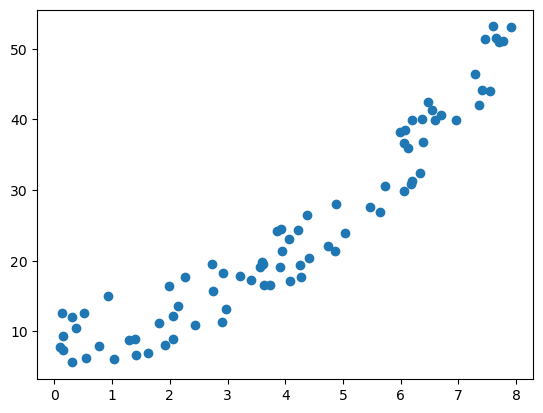

In [27]:
plt.scatter(x_train,y_train)

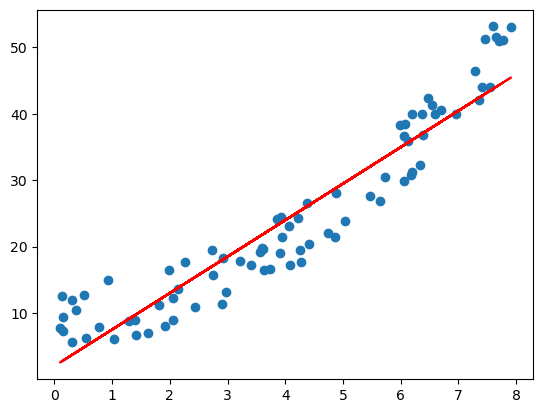

In [28]:
plt.scatter(x_train,y_train)
plt.plot(x_train, lr.predict(x_train), color = "r")

In [30]:
# Present your solution
# save ML Model
import joblib
joblib.dump(lr, "student_marks_predictor_model.pkl")

['student_marks_predictor_model.pkl']

In [31]:
model = joblib.load("student_marks_predictor_model.pkl")

In [32]:
model.predict([[5]])[0][0]

E:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.48966424932991